<a href="https://colab.research.google.com/github/Dain777666/ESAA_25-2/blob/main/OB_WEEK13_MON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7장. 시계열 분석

## 7.1 시계열 문제

- 시계열 분석: 시간에 따라 변하는 데이터를 사용하여 추이를 분석하는 것

- 예: 주가/환율 변동 및 기온/습도 변화 등

- 규칙적 시계열과 불규칙적 시계열로 나뉨

  - 규칙적 시계열: 트렌드와 분산이 불변하는 데이터

  - 불규칙적 시계열: 트렌드 혹은 분산이 변화하는 시계열 데이터

<시계열 형태>

1. 불규칙 변동: 시계열 자료에서 시간에 따른 규칙적인 움직임과 달리 어떤
규칙성이 없어 예측 불가능하고 우연적으로 발생하는 변동을 의미함

- 예: 전쟁, 홍수，화재，지진，파업 등

2. 추세 변동: 시계열 자료가 갖는 장기적인 변화 추세를 의미함

- 예: 국내총생산(GDP), 인구증가율 등

3. 순환 변동: 대체로 2~3년 정도의 일정한 기간을 주기로 순환적으로 나타나는 변동을 의미함

- 예: 경기 변동

4. 계절 변동: 시계열 자료에서 보통 계절적 영향과 사회적 관습에 따라 1년
주기로 발생하는 것을 의미함



## 7.2 AR, MA, ARMA, ARIMA

- 시간을 독립변수로 사용하여 종속변수를 예측함

### 7.2.1 AR(AutoRegessive) 모델

- 이전 관측 값이 이후 관측 값에 영향을 준다는 아이디어에 대한 모형으로 자기 회귀 모델이라고도 함

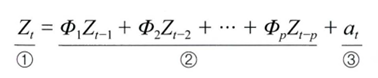

- 1번은 현재 시점

- 2번은 과거가 현재에 미치는 영향을 나타내는 모수(φ)에 시계열 데이터의 과거 시점을 곱한 것

- 3번은 오차항(백색 잡음)



### 7.2.2 MA(Moving Average) 모델

- 트렌드(평균 혹은 시계열 그래프에서 y값)가 변화하는 상황에 적합한 회귀 모델

- 윈도우 크기만큼 슬라이딩 됨

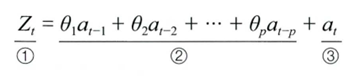

- 1번은 현재 시점

- 2번은 매개변수(theta)에 과거 시점의 오차를 곱한 것 -> 즉, 이전 데이터의 오차에서 현재 데이터의 상태를 추론함

- 3번은 오차항



### 7.2.3 ARMA 모델

- AR과 MA를 섞은 모델

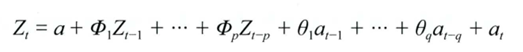

### 7.2.4 ARIMA(AutoRegressive lntegrated Moving Average) 모델

- ARMA와 달리 과거 데이터의 선형 관계뿐만 아니라 추세까지 고려한 모델

- ARIMA(p:자기 회귀 차수, d:차분 차수, q:이동 평균 차수)


In [1]:
!pip install statsmodels

/tmp/ipython-input-2818517480.py:10: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = read_csv('sales.csv', header=0, parse_dates=[0],
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -199.651
Date:                Tue, 25 Nov 2025   AIC                            411.302
Time:                        14:49:35   BIC                            420.634
Sample:                    01-01-1991   HQIC                           414.523
                         - 12-01-1993                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8788      0.227     -3.876      0.000      -1.323      -0.434
ar.L2         -0.2787      0.232     -1.203      0.229      -0.733       0.176
ar.L3         -0.0076      0.270     -0.028      0.9

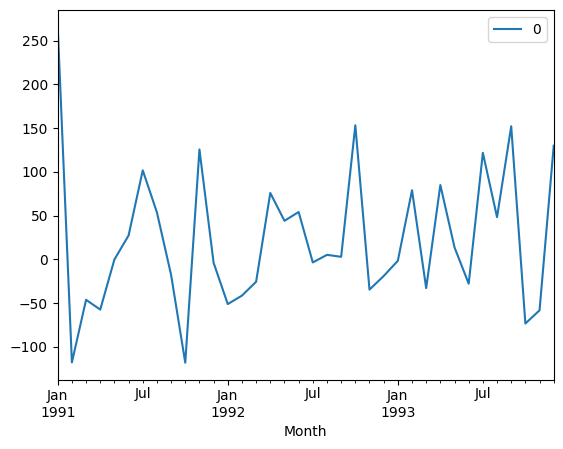

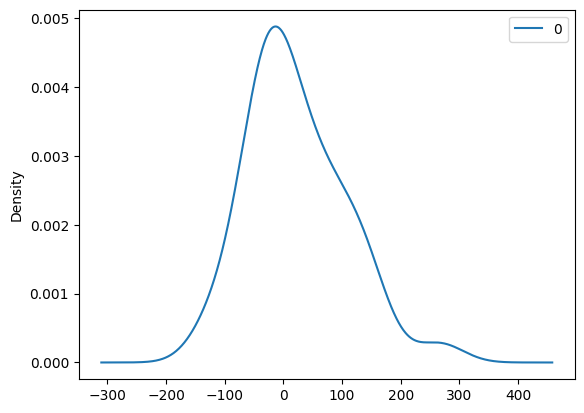

                0
count   36.000000
mean    22.459086
std     82.505331
min   -118.213281
25%    -33.308343
50%      1.361178
75%     76.704967
max    266.000000


In [2]:
from pandas import read_csv
from datetime import datetime
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot

def parser(x):
  return datetime.strptime('199'+x, '%Y-%m')

series = read_csv('sales.csv', header=0, parse_dates=[0],
                  index_col=0, date_parser=parser)

model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

residuals.plot(kind='kde')
pyplot.show()

print(residuals.describe())

/tmp/ipython-input-4079618609.py:11: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = read_csv('sales.csv', header=0, parse_dates=[0], index_col=0,
/tmp/ipython-input-4079618609.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('predicted=%f, expected=%f' % (yhat, obs))


predicted=352.855343, expected=346.300000
predicted=277.398036, expected=329.700000
predicted=368.753734, expected=445.400000
predicted=331.773635, expected=325.900000
predicted=372.070407, expected=449.300000
predicted=360.020872, expected=411.300000
predicted=454.526230, expected=417.400000
predicted=388.690699, expected=545.500000
predicted=437.632447, expected=477.600000
predicted=516.437624, expected=687.000000
predicted=520.916191, expected=435.300000
predicted=675.594647, expected=587.300000
predicted=505.201016, expected=676.900000
Test MSE: 9118.818


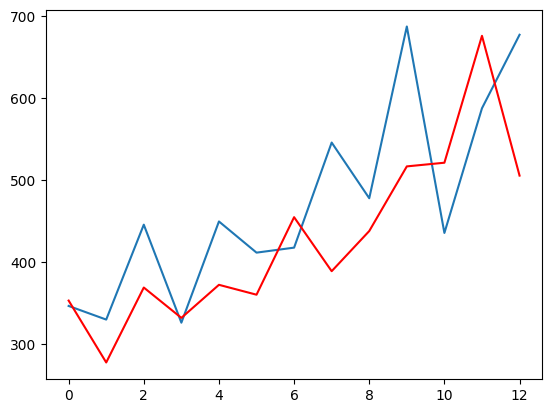

In [3]:
import numpy as np
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

def parser(x):
  return datetime.strptime('199'+x, '%Y-%m')

series = read_csv('sales.csv', header=0, parse_dates=[0], index_col=0,
                  date_parser=parser)
X = series.values
X = np.nan_to_num(X)
size = int(len(X)*0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
  model = ARIMA(history, order=(5,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = output[0]
  predictions.append(yhat)
  obs = test[t]
  history.append(obs)
  print('predicted=%f, expected=%f' % (yhat, obs))

error = mean_squared_error(test, predictions)
print('Test MSE: %.3f'%error)
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

## 7.3 순환 신경망(RNN)

-  이전 은닉층이 현재 은닉층의 입력이 되면서 반복되는 순환 구조를 가짐

- '기억'(현재까지 입력 데이터를 요약한 정보)

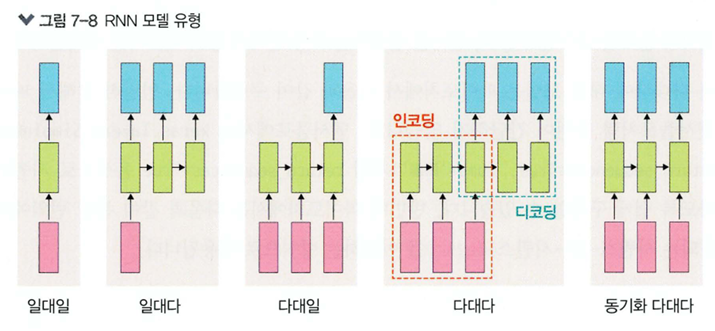

### 7.3.1 RNN 계층과 셀

<셀 유형>

1. nn.RNNCell: SimpleRNN 계층에 대응되는 RNN 셀

2. nn.GRUCell: GRU 계층에 대응되는 GRU 셀

3. nn.LSTMCell: LSTM 계층에 대응되는 LSTM 셀

------------------------------------------------------------------------------

# RNN 실습 1 - 문자 단위 RNN(Char RNN)

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

In [2]:
input_str = 'apple'
label_str = 'pple!'
char_vocab = sorted(list(set(input_str+label_str)))
vocab_size = len(char_vocab)
print ('문자 집합의 크기 : {}'.format(vocab_size))

문자 집합의 크기 : 5


In [3]:
input_size = vocab_size # 입력의 크기는 문자 집합의 크기
hidden_size = 5
output_size = 5
learning_rate = 0.1

In [4]:
char_to_index = dict((c, i) for i, c in enumerate(char_vocab)) # 문자에 고유한 정수 인덱스 부여
print(char_to_index)

{'!': 0, 'a': 1, 'e': 2, 'l': 3, 'p': 4}


In [5]:
index_to_char={}
for key, value in char_to_index.items():
    index_to_char[value] = key
print(index_to_char)

{0: '!', 1: 'a', 2: 'e', 3: 'l', 4: 'p'}


In [6]:
x_data = [char_to_index[c] for c in input_str]
y_data = [char_to_index[c] for c in label_str]
print(x_data)
print(y_data)

[1, 4, 4, 3, 2]
[4, 4, 3, 2, 0]


In [7]:
# 배치 차원 추가
# 텐서 연산인 unsqueeze(0)를 통해 해결할 수도 있었음.
x_data = [x_data]
y_data = [y_data]
print(x_data)
print(y_data)

[[1, 4, 4, 3, 2]]
[[4, 4, 3, 2, 0]]


In [8]:
x_one_hot = [np.eye(vocab_size)[x] for x in x_data]
print(x_one_hot)

[array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.]])]


In [9]:
X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)

/tmp/ipython-input-2348034151.py:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:253.)
  X = torch.FloatTensor(x_one_hot)


In [10]:
print('훈련 데이터의 크기 : {}'.format(X.shape))
print('레이블의 크기 : {}'.format(Y.shape))

훈련 데이터의 크기 : torch.Size([1, 5, 5])
레이블의 크기 : torch.Size([1, 5])


In [11]:
class Net(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        self.rnn = torch.nn.RNN(input_size, hidden_size, batch_first=True) # RNN 셀 구현
        self.fc = torch.nn.Linear(hidden_size, output_size, bias=True) # 출력층 구현

    def forward(self, x): # 구현한 RNN 셀과 출력층을 연결
        x, _status = self.rnn(x)
        x = self.fc(x)
        return x

In [12]:
net = Net(input_size, hidden_size, output_size)

In [13]:
outputs = net(X)
print(outputs.shape) # 3차원 텐서

torch.Size([1, 5, 5])


In [14]:
print(outputs.view(-1, input_size).shape) # 2차원 텐서로 변환

torch.Size([5, 5])


In [15]:
print(Y.shape)
print(Y.view(-1).shape)

torch.Size([1, 5])
torch.Size([5])


In [16]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), learning_rate)

In [17]:
for i in range(100):
    optimizer.zero_grad()
    outputs = net(X)
    loss = criterion(outputs.view(-1, input_size), Y.view(-1)) # view를 하는 이유는 Batch 차원 제거를 위해
    loss.backward() # 기울기 계산
    optimizer.step() # 아까 optimizer 선언 시 넣어둔 파라미터 업데이트

    # 아래 세 줄은 모델이 실제 어떻게 예측했는지를 확인하기 위한 코드.
    result = outputs.data.numpy().argmax(axis=2) # 최종 예측값인 각 time-step 별 5차원 벡터에 대해서 가장 높은 값의 인덱스를 선택
    result_str = ''.join([index_to_char[c] for c in np.squeeze(result)])
    print(i, "loss: ", loss.item(), "prediction: ", result, "true Y: ", y_data, "prediction str: ", result_str)

0 loss:  1.5426461696624756 prediction:  [[3 3 3 2 2]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  lllee
1 loss:  1.2577779293060303 prediction:  [[0 4 3 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  !ple!
2 loss:  0.9476174116134644 prediction:  [[4 4 3 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pple!
3 loss:  0.6659154295921326 prediction:  [[4 4 3 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pple!
4 loss:  0.4338846206665039 prediction:  [[4 4 3 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pple!
5 loss:  0.27128130197525024 prediction:  [[4 4 3 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pple!
6 loss:  0.16960576176643372 prediction:  [[4 4 3 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pple!
7 loss:  0.10729916393756866 prediction:  [[4 4 3 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pple!
8 loss:  0.06958706676959991 prediction:  [[4 4 3 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pple!
9 loss:  0.04677613824605942 prediction:  [[4 4 3 2

# RNN 실습 2 - 더 많은 데이터로 학습

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim

In [19]:
sentence = ("if you want to build a ship, don't drum up people together to "
            "collect wood and don't assign them tasks and work, but rather "
            "teach them to long for the endless immensity of the sea.")

In [20]:
char_set = list(set(sentence)) # 중복을 제거한 문자 집합 생성
char_dic = {c: i for i, c in enumerate(char_set)} # 각 문자에 정수 인코딩

In [21]:
print(char_dic) # 공백도 여기서는 하나의 원소

{'k': 0, 'c': 1, 'i': 2, 'n': 3, 'b': 4, 'e': 5, 'd': 6, ',': 7, 'r': 8, ' ': 9, "'": 10, 't': 11, 'y': 12, 's': 13, 'm': 14, 'p': 15, 'f': 16, 'u': 17, 'h': 18, 'a': 19, '.': 20, 'o': 21, 'g': 22, 'w': 23, 'l': 24}


In [22]:
dic_size = len(char_dic)
print('문자 집합의 크기 : {}'.format(dic_size))

문자 집합의 크기 : 25


In [23]:
# 하이퍼파라미터 설정
hidden_size = dic_size
sequence_length = 10  # 임의 숫자 지정
learning_rate = 0.1

In [24]:
# 데이터 구성
x_data = []
y_data = []

for i in range(0, len(sentence) - sequence_length):
    x_str = sentence[i:i + sequence_length]
    y_str = sentence[i + 1: i + sequence_length + 1]
    print(i, x_str, '->', y_str)

    x_data.append([char_dic[c] for c in x_str])  # x str to index
    y_data.append([char_dic[c] for c in y_str])  # y str to index

0 if you wan -> f you want
1 f you want ->  you want 
2  you want  -> you want t
3 you want t -> ou want to
4 ou want to -> u want to 
5 u want to  ->  want to b
6  want to b -> want to bu
7 want to bu -> ant to bui
8 ant to bui -> nt to buil
9 nt to buil -> t to build
10 t to build ->  to build 
11  to build  -> to build a
12 to build a -> o build a 
13 o build a  ->  build a s
14  build a s -> build a sh
15 build a sh -> uild a shi
16 uild a shi -> ild a ship
17 ild a ship -> ld a ship,
18 ld a ship, -> d a ship, 
19 d a ship,  ->  a ship, d
20  a ship, d -> a ship, do
21 a ship, do ->  ship, don
22  ship, don -> ship, don'
23 ship, don' -> hip, don't
24 hip, don't -> ip, don't 
25 ip, don't  -> p, don't d
26 p, don't d -> , don't dr
27 , don't dr ->  don't dru
28  don't dru -> don't drum
29 don't drum -> on't drum 
30 on't drum  -> n't drum u
31 n't drum u -> 't drum up
32 't drum up -> t drum up 
33 t drum up  ->  drum up p
34  drum up p -> drum up pe
35 drum up pe -> rum up peo
36

In [25]:
print(x_data[0])
print(y_data[0])

[2, 16, 9, 12, 21, 17, 9, 23, 19, 3]
[16, 9, 12, 21, 17, 9, 23, 19, 3, 11]


In [26]:
x_one_hot = [np.eye(dic_size)[x] for x in x_data] # x 데이터는 원-핫 인코딩
X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)

In [27]:
print('훈련 데이터의 크기 : {}'.format(X.shape))
print('레이블의 크기 : {}'.format(Y.shape))

훈련 데이터의 크기 : torch.Size([170, 10, 25])
레이블의 크기 : torch.Size([170, 10])


In [28]:
print(X[0])

tensor([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [29]:
print(Y[0])

tensor([16,  9, 12, 21, 17,  9, 23, 19,  3, 11])


In [30]:
class Net(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, layers): # 현재 hidden_size는 dic_size와 같음.
        super(Net, self).__init__()
        self.rnn = torch.nn.RNN(input_dim, hidden_dim, num_layers=layers, batch_first=True)
        self.fc = torch.nn.Linear(hidden_dim, hidden_dim, bias=True)

    def forward(self, x):
        x, _status = self.rnn(x)
        x = self.fc(x)
        return x

In [31]:
net = Net(dic_size, hidden_size, 2) # 이번에는 층을 두 개 쌓습니다.

In [32]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), learning_rate)

In [33]:
outputs = net(X)
print(outputs.shape) # 3차원 텐서

torch.Size([170, 10, 25])


In [34]:
print(outputs.view(-1, dic_size).shape) # 2차원 텐서로 변환.

torch.Size([1700, 25])


In [35]:
print(Y.shape)
print(Y.view(-1).shape)

torch.Size([170, 10])
torch.Size([1700])


In [36]:
torch.Size([170, 10])
torch.Size([1700])

torch.Size([1700])

In [37]:
for i in range(100):
    optimizer.zero_grad()
    outputs = net(X) # (170, 10, 25) 크기를 가진 텐서를 매 에포크마다 모델의 입력으로 사용
    loss = criterion(outputs.view(-1, dic_size), Y.view(-1))
    loss.backward()
    optimizer.step()

    # results의 텐서 크기는 (170, 10)
    results = outputs.argmax(dim=2)
    predict_str = ""
    for j, result in enumerate(results):
        if j == 0: # 처음에는 예측 결과를 전부 가져오지만
            predict_str += ''.join([char_set[t] for t in result])
        else: # 그 다음에는 마지막 글자만 반복 추가
            predict_str += char_set[result[-1]]

    print(predict_str)

nnbbbbbtbtbbnbbbbbbbbbbntnbbbbtbbnbbtbbbbbbbbtbbbbnnbbttbtbnbbbtbbbbbbtbbbbbtbbbttbnbbtnbbbbbnbtbnnnbnbbtbbnbbbnbbnnbbbntbtbnbnbtbntbtbnbbbnbbbtbbbntbbbtbbbtnbbbbbttbnbbbtbnnbbbbn
                                                                                                                                                                                   
  t  totototott tot totttt t tot ttott t t t tottot t t t t t t tooto tot toto tot t t t t tottoott t toot to ott o t tott t t t to t ootot tott  tott t t t t t ootooottot t t t t
  bgbs.fnk.c ogb gpodghdgodp pncn. podg. .ngh.ghdgo  po phdg. o gp  r gr pg rhgpnpn bpbc.o po g  pn g.npnc fnp d pn .gndbh pbdko bpnco o. p dphd  gpbpncopo  gbko  g..o co gp dbhgf
      l  d l   d    d  d  d    a  l  d       n  d  dd  d  d     d  l  a       d              d      m l                d     dd  l          d     l                    dd        m 
    e u t    t   t t     d  t a u e a   a t tn t t   d tda       dt  t    t  t  t u t d   t t u t   